### Importação das bibliotecas

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

#### Leitura dos dados

In [35]:
df = pd.read_csv(
    r'C:\Estudos\alura\data-science\9-dataviz\dados\imigrantes_canada.csv',
    sep=','
)

In [36]:
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [37]:
# df.info()

In [38]:
df = df.set_index('País')

In [39]:
# Criação da lista dos anos

anos = list(map(str, range(1980, 2013 + 1)))

In [40]:
# anos

In [41]:
brasil = df.loc['Brasil', anos]

#### Criação de um dataframe com os dados do Brasil

In [42]:
brasil_dict = {
    'Ano': brasil.index.tolist(),
    'Imigrantes': brasil.values.tolist()
}

dados_brasil = pd.DataFrame(brasil_dict)

In [43]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [44]:
# Configurações iniciais armazenadas

IPython_default = plt.rcParams.copy()

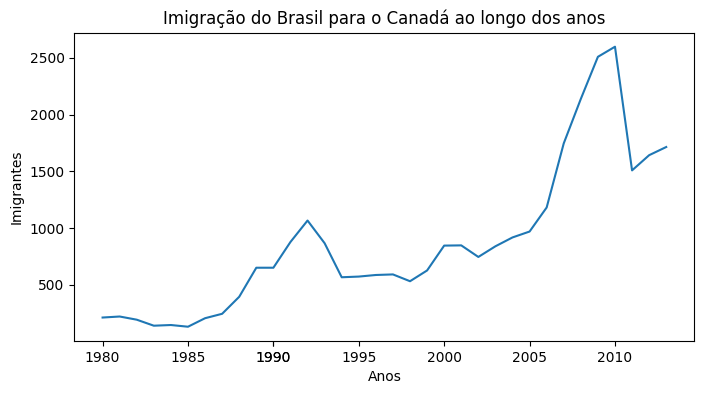

In [45]:
plt.figure(figsize=(8,4))

plt.plot(
    dados_brasil['Ano'],
    dados_brasil['Imigrantes']
)

plt.title('Imigração do Brasil para o Canadá ao longo dos anos')
plt.xlabel('Anos')
plt.ylabel('Imigrantes')

plt.xticks(['1980', '1985', '1990', '1990',
            '1995', '2000', '2005', '2010'])

# plt.yticks([500, 1000, 1500, 2000, 2500])

plt.show()

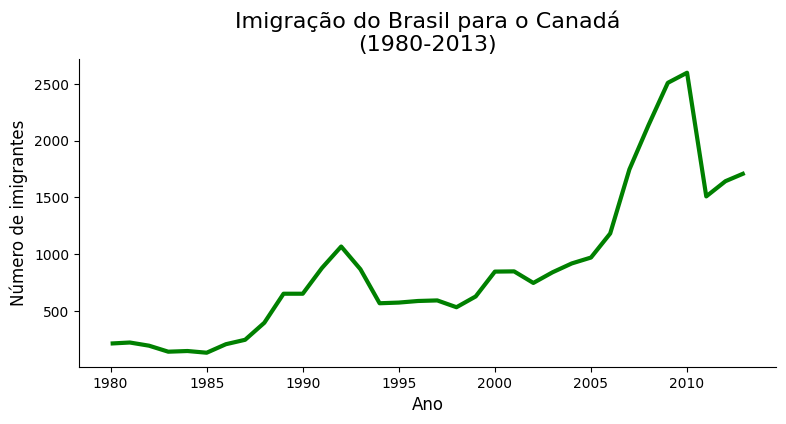

In [137]:
fig, ax = plt.subplots(figsize=(9,4))
# plt.style.use('fivethirtyeight')

with plt.style.context('fivethirtyeight'):
    ax.plot(dados_brasil['Ano'], dados_brasil['Imigrantes'], lw=3, color='g')
    ax.set_title('Imigração do Brasil para o Canadá\n(1980-2013)', fontsize=16)
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Número de imigrantes', fontsize=12)
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=10)
    # plt.grid(linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if os.path.exists(
        r'C:\Estudos\alura\data-science\9-dataviz\graficos\imigracao_brasil_canada.png'
    ):
        # print('Gráfico já existe.')
        pass
    else:
        fig.savefig(
            r'C:\Estudos\alura\data-science\9-dataviz\graficos\imigracao_brasil_canada.png',
            transparent=False, dpi=300,
            bbox_inches='tight', facecolor='white'
        )

    plt.show()

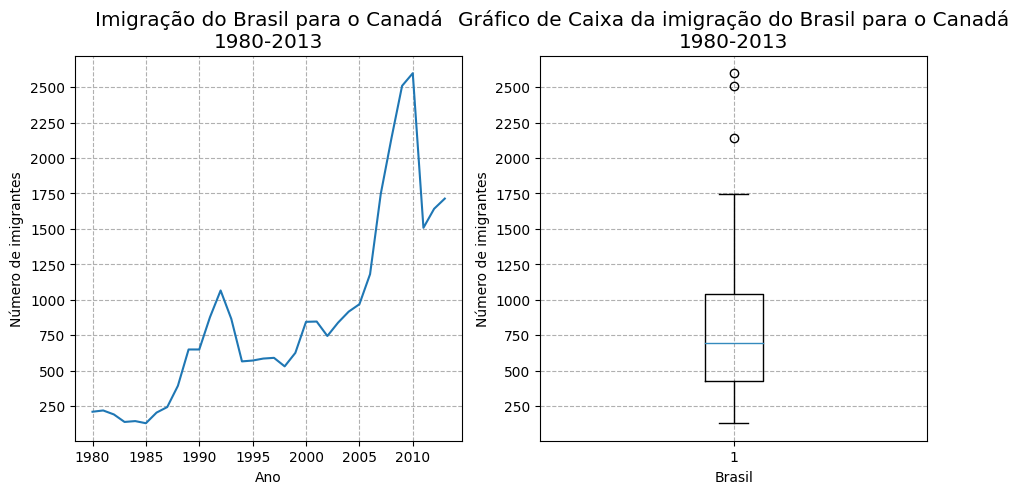

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

with plt.style.context('ggplot'):
    axs[0].plot(dados_brasil['Ano'], dados_brasil['Imigrantes'])
    axs[0].set_title('Imigração do Brasil para o Canadá\n1980-2013')
    axs[0].set_xlabel('Ano')
    axs[0].set_ylabel('Número de imigrantes')
    axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
    axs[0].yaxis.set_major_locator(plt.MultipleLocator(250))
    axs[0].grid(linestyle='--')

    # --------------------------------------------------------------------------

    axs[1].boxplot(dados_brasil['Imigrantes'])
    axs[1].set_title('Gráfico de Caixa da imigração do Brasil para o Canadá\n1980-2013')
    axs[1].set_xlabel('Brasil')
    axs[1].set_ylabel('Número de imigrantes')
    axs[1].yaxis.set_major_locator(plt.MultipleLocator(250))
    axs[1].grid(linestyle='--')

    plt.show()

In [48]:
# dados_brasil.describe(include='all').__round__(2)

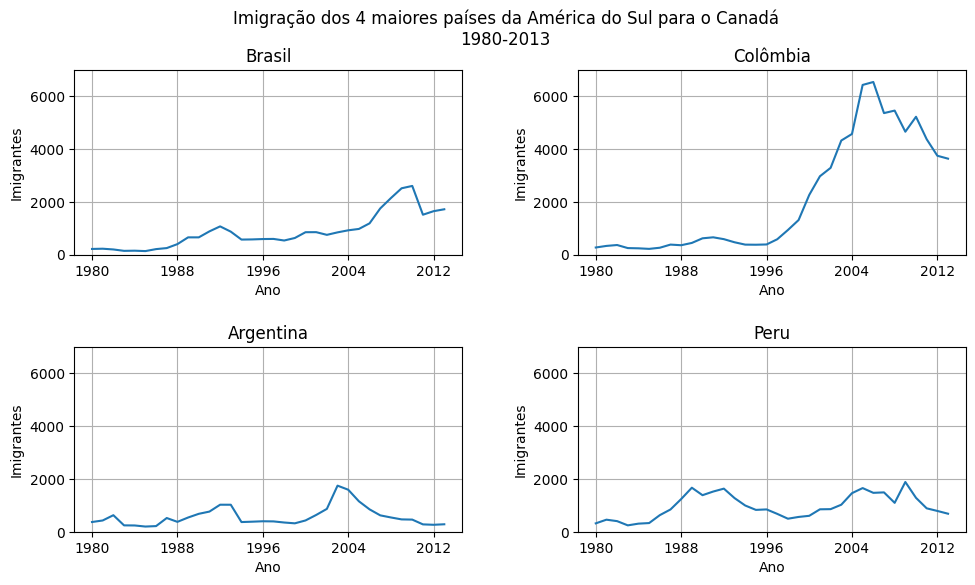

In [49]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11.5, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Imigração dos 4 maiores países da América do Sul para o Canadá\n1980-2013')

with plt.style.context('seaborn-v0_8-dark-palette'):
    axs[0,0].plot(df.loc['Brasil', anos])
    axs[0,0].set_title('Brasil')

    axs[0,1].plot(df.loc['Colômbia', anos])
    axs[0,1].set_title('Colômbia')

    axs[1,0].plot(df.loc['Argentina', anos])
    axs[1,0].set_title('Argentina')

    axs[1,1].plot(df.loc['Peru', anos])
    axs[1,1].set_title('Peru')

    y_min = 0
    y_max = 7000

    for r in range(2):
        for c in range(2):
            axs[r,c].xaxis.set_major_locator(plt.MultipleLocator(8))
            # axs[r,c].yaxis.set_major_locator(plt.MultipleLocator(1000))
            axs[r,c].set_xlabel('Ano')
            axs[r,c].set_ylabel('Imigrantes')
            axs[r,c].set_ylim(y_min, y_max)
            axs[r,c].grid()

    plt.show()

In [59]:
america_sul = df.query(
    "Região == 'América do Sul'"
)

# america_sul

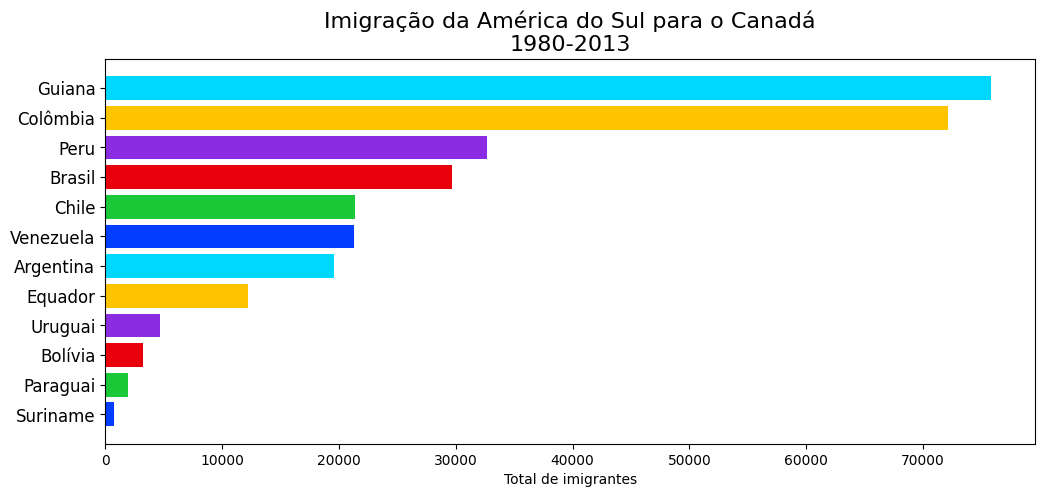

In [94]:
palette = sns.color_palette('bright6', 12)

fig, ax = plt.subplots(figsize=(12, 5))

with plt.style.context('fivethirtyeight'):
    ax.barh(america_sul.sort_values(by='Total').index, america_sul['Total'].sort_values(), color=palette)
    ax.set_title('Imigração da América do Sul para o Canadá\n1980-2013',
                 fontsize=16)
    ax.set_ylabel('')
    ax.set_xlabel('Total de imigrantes')
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=12)

    plt.show()

### Destacando o Brasil

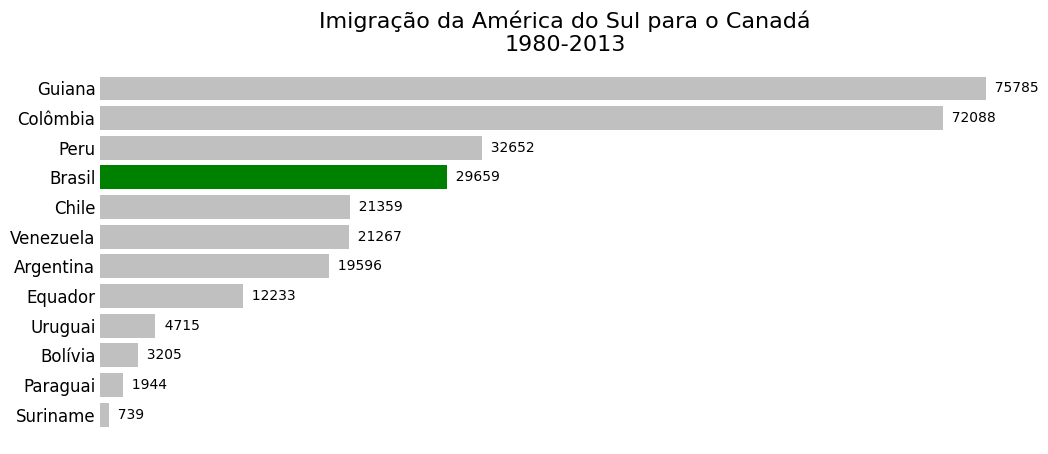

In [140]:
cores = []

for pais in america_sul.sort_values(by='Total').index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')


fig, ax = plt.subplots(figsize=(12, 5))

with plt.style.context('fivethirtyeight'):
    ax.barh(america_sul.sort_values(by='Total').index,
            america_sul['Total'].sort_values(ascending=True),
            color=cores)
    ax.set_title('Imigração da América do Sul para o Canadá\n1980-2013',
                 fontsize=16)
    ax.set_ylabel('')
    ax.set_xlabel('Total de imigrantes')
    ax.xaxis.set_tick_params(labelsize=10)
    ax.yaxis.set_tick_params(labelsize=12)

    for i, v in enumerate(america_sul.sort_values(by='Total')['Total']):
        ax.text(v + 20, i, f'  {str(v)}', color='black', fontsize=10, ha='left', va='center')
    
    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)

    if os.path.exists(
        r'C:\Estudos\alura\data-science\9-dataviz\graficos\imigracao_america_sul.png'
    ):
        # print('Gráfico já foi salvo neste caminho.')
        pass
    else:
        fig.savefig(
            r'C:\Estudos\alura\data-science\9-dataviz\graficos\imigracao_america_sul.png',
            bbox_inches='tight', dpi=300,
            transparent=False, facecolor='white'
        )

    plt.show()

In [141]:
# Formatos suportados para salvamento

'''for format, explanation in fig.canvas.get_supported_filetypes().items():
    print(f'{format} --> {explanation}')''';